In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('6722-credit-card-default-data.csv')
test = pd.read_csv('6722-pilot-customers.csv')

In [3]:
train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,3,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,4,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,5,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [4]:
train.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

# Init Setup

In [5]:
from pycaret.classification import *
s = setup(train, target = 'DEFAULT', session_id = 123, ignore_features = ['ID'],
        categorical_features=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])

,Description,Value
0,Session id,123
1,Target,DEFAULT
2,Target type,Binary
3,Original data shape,"(24000, 25)"
4,Transformed data shape,"(24000, 90)"
5,Transformed train set shape,"(16800, 90)"
6,Transformed test set shape,"(7200, 90)"
7,Ignore features,1
8,Ordinal features,1
9,Numeric features,14


In [6]:
get_config('X_train_transformed').columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION_1.0', 'EDUCATION_2.0', 'EDUCATION_3.0',
       'EDUCATION_6.0', 'EDUCATION_5.0', 'EDUCATION_0.0', 'EDUCATION_4.0',
       'MARRIAGE_2.0', 'MARRIAGE_1.0', 'MARRIAGE_3.0', 'MARRIAGE_0.0', 'AGE',
       'PAY_1_1.0', 'PAY_1_2.0', 'PAY_1_-1.0', 'PAY_1_0.0', 'PAY_1_-2.0',
       'PAY_1_5.0', 'PAY_1_3.0', 'PAY_1_8.0', 'PAY_1_4.0', 'PAY_1_6.0',
       'PAY_1_7.0', 'PAY_2_2.0', 'PAY_2_-2.0', 'PAY_2_0.0', 'PAY_2_3.0',
       'PAY_2_-1.0', 'PAY_2_4.0', 'PAY_2_7.0', 'PAY_2_1.0', 'PAY_2_5.0',
       'PAY_2_6.0', 'PAY_3_0.0', 'PAY_3_2.0', 'PAY_3_-1.0', 'PAY_3_-2.0',
       'PAY_3_3.0', 'PAY_3_7.0', 'PAY_3_6.0', 'PAY_3_5.0', 'PAY_3_4.0',
       'PAY_3_8.0', 'PAY_3_1.0', 'PAY_4_0.0', 'PAY_4_2.0', 'PAY_4_-2.0',
       'PAY_4_-1.0', 'PAY_4_7.0', 'PAY_4_3.0', 'PAY_4_5.0', 'PAY_4_4.0',
       'PAY_4_6.0', 'PAY_4_8.0', 'PAY_4_1.0', 'PAY_5_0.0', 'PAY_5_-1.0',
       'PAY_5_-2.0', 'PAY_5_2.0', 'PAY_5_3.0', 'PAY_5_7.0', 'PAY_5_4.0',
       'PAY_5_5.0', 'PAY_5_6.0', 'PAY_5

# Compare Models

In [7]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8225,0.7692,0.3858,0.6717,0.4896,0.3917,0.4140,0.3540
ridge,Ridge Classifier,0.8221,0.0000,0.3664,0.6823,0.4763,0.3808,0.4077,0.2220
gbc,Gradient Boosting Classifier,0.8205,0.7825,0.3673,0.6729,0.4748,0.3777,0.4031,4.1720
lightgbm,Light Gradient Boosting Machine,0.8193,0.7791,0.3810,0.6586,0.4824,0.3823,0.4035,0.6440
ada,Ada Boost Classifier,0.8192,0.7754,0.3463,0.6783,0.4582,0.3632,0.3929,1.1500
catboost,CatBoost Classifier,0.8188,0.7804,0.3778,0.6575,0.4794,0.3793,0.4009,9.2800
rf,Random Forest Classifier,0.8135,0.7621,0.3673,0.6364,0.4652,0.3620,0.3823,1.9150
xgboost,Extreme Gradient Boosting,0.8131,0.7631,0.3716,0.6316,0.4677,0.3635,0.3824,0.6250
et,Extra Trees Classifier,0.8038,0.7382,0.3702,0.5903,0.4547,0.3427,0.3568,1.4680
qda,Quadratic Discriminant Analysis,0.7836,0.7161,0.1949,0.5905,0.2614,0.1789,0.2297,0.3020


# Model Diagnostics

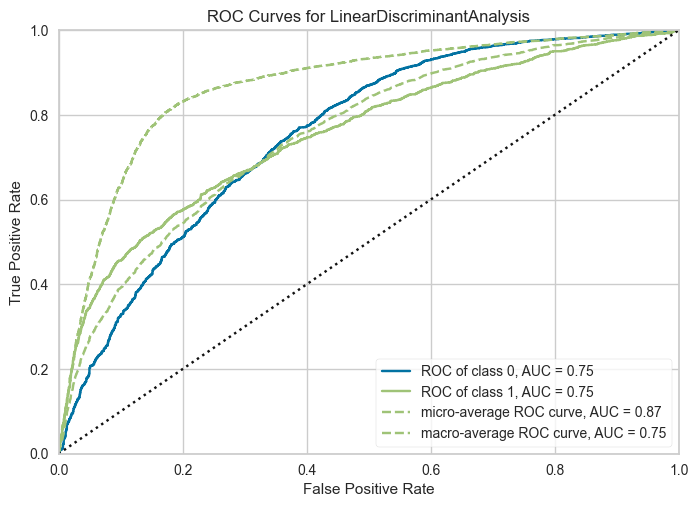

In [8]:
plot_model(best, plot = 'auc')

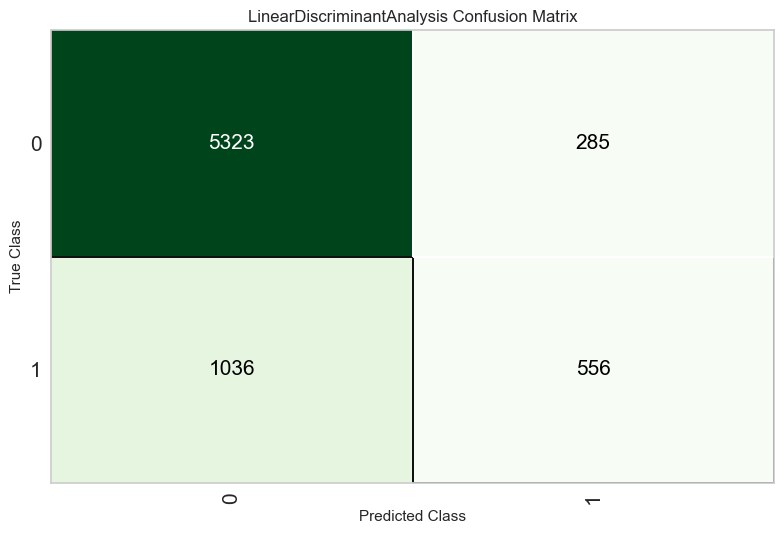

In [9]:
plot_model(best, plot = 'confusion_matrix')

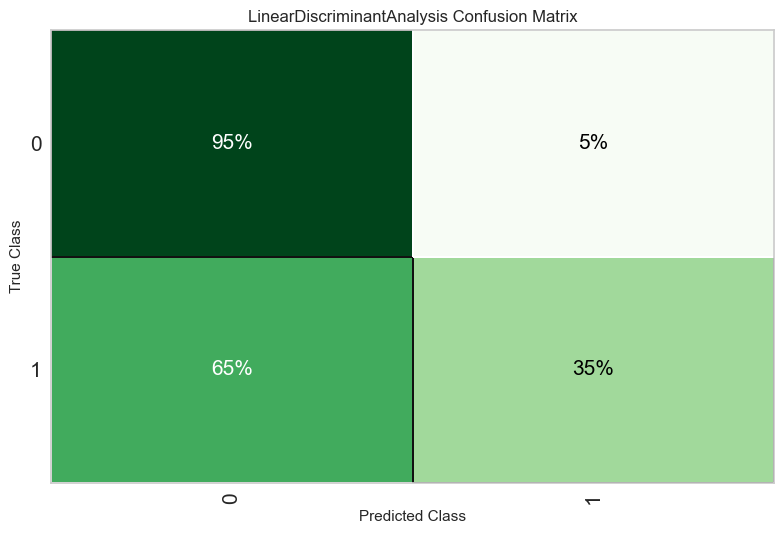

In [10]:
plot_model(best, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

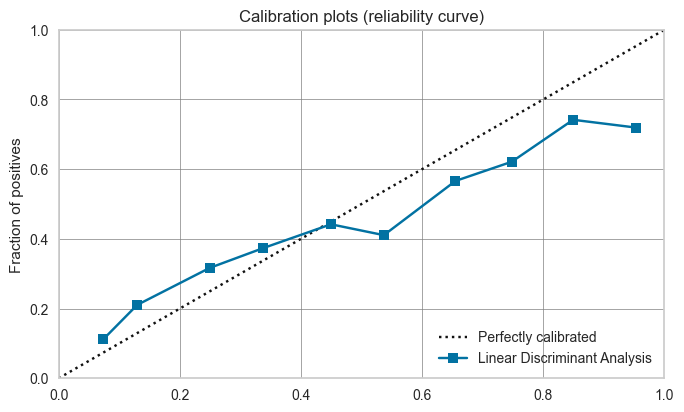

In [11]:
plot_model(best, plot = 'calibration')

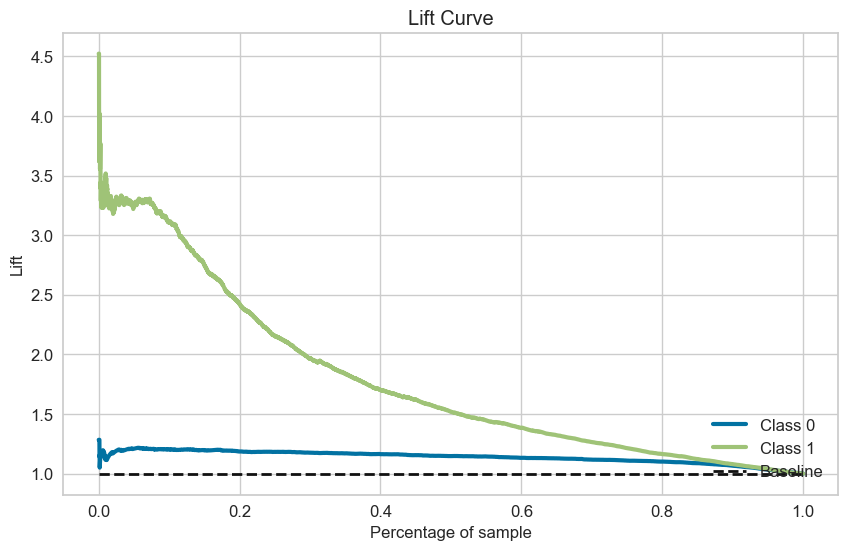

In [12]:
plot_model(best, plot = 'lift')

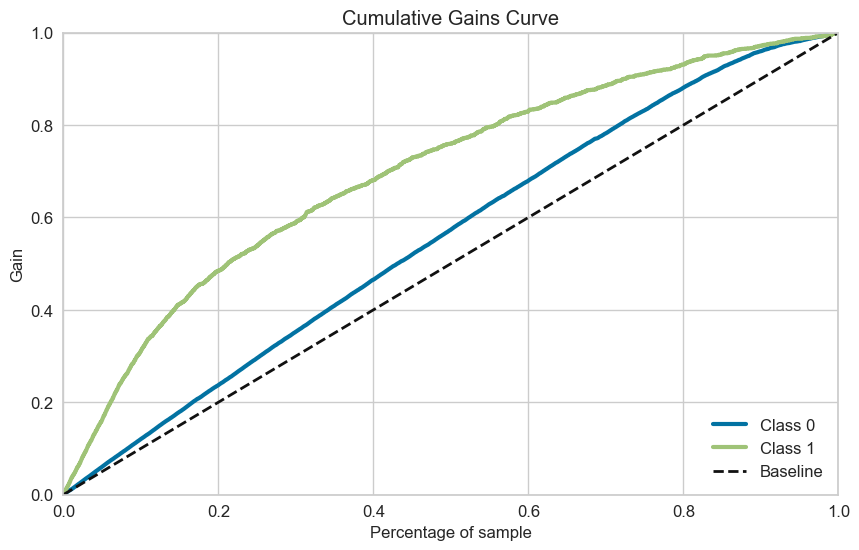

In [13]:
plot_model(best, plot = 'gain')

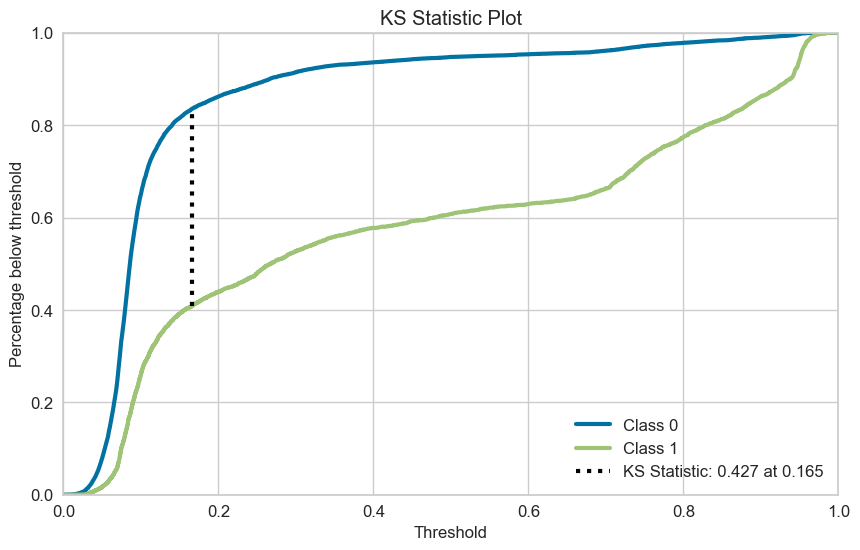

In [14]:
plot_model(best, plot = 'ks')

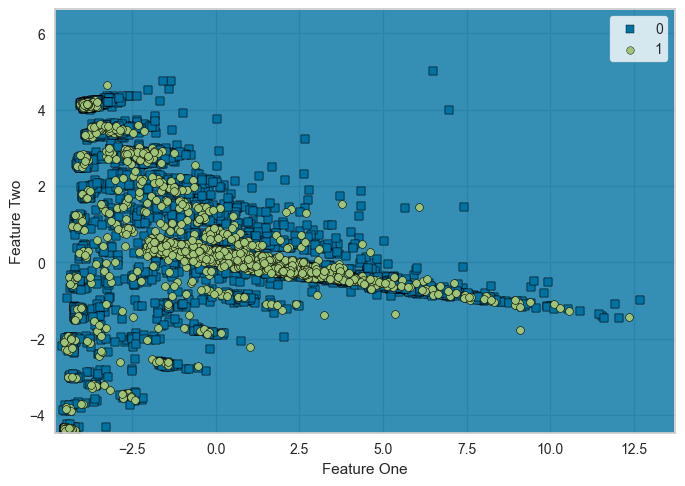

In [15]:
plot_model(best, plot = 'boundary')

In [16]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [17]:
predict_model(best);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8165,0.7542,0.3492,0.6611,0.4570,0.3591,0.3856


# Predictions before Threshold Optimization

In [18]:
predictions = predict_model(best, data = test)
predictions.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,prediction_label,prediction_score
0,n1000-1,500000.0,1,1,2,29,0,0,0,0,...,483003,473944,55000.0,40000.0,38000.0,20239,13750.0,13770,0,0.9444
1,n1000-2,210000.0,1,1,2,29,-2,-2,-2,-2,...,0,0,0.0,0.0,0.0,0,0.0,0,0,0.8982
2,n1000-3,150000.0,1,1,2,27,0,0,0,0,...,87725,40788,4031.0,10006.0,3266.0,4040,1698.0,800,0,0.9213
3,n1000-4,20000.0,1,2,1,38,0,0,0,0,...,17928,150,1699.0,1460.0,626.0,1750,150.0,0,0,0.8935
4,n1000-5,400000.0,1,2,1,34,-1,-1,-1,-1,...,14837,7959,9677.0,11867.0,7839.0,14837,7959.0,5712,0,0.9277


In [19]:
predictions.to_csv('predictions1.csv', index = False)

# Threshold Optimization

In [20]:
best

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [21]:
optimize_threshold(best)

optimization loop finished successfully. Best threshold: 0.65625 with Accuracy=0.8223


CustomProbabilityThresholdClassifier(classifier=LinearDiscriminantAnalysis(covariance_estimator=None,
                                                                           n_components=None,
                                                                           priors=None,
                                                                           shrinkage=None,
                                                                           solver='svd',
                                                                           store_covariance=False,
                                                                           tol=0.0001),
                                     covariance_estimator=None,
                                     n_components=None, priors=None,
                                     probability_threshold=0.65625,
                                     shrinkage=None, solver='svd',
                                     store_covariance=False, tol=0.0001)

# Predictions after Threshold Optimization

In [22]:
predictions = predict_model(best, data = test, probability_threshold = 0.65625)
predictions.to_csv('predictions2.csv', index=False)

# Custom Profit Metric 

In [23]:
# true_negative = 1500
# false_negative = -5000

# create a custom function
def calculate_profit(y, y_pred):
    tn = np.where((y_pred==0) & (y==0), 1500, 0)
    fn = np.where((y_pred==0) & (y==1), -5000, 0)
    return np.sum([tn,fn])

# add metric to PyCaret
add_metric('profit', 'Profit', calculate_profit)

Name                                                            Profit
Display Name                                                    Profit
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer                                   make_scorer(calculate_profit)
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: profit, dtype: object

In [24]:
best = compare_models(sort = 'Profit')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit,TT (Sec)
lda,Linear Discriminant Analysis,0.8225,0.7692,0.3858,0.6717,0.4896,0.3917,0.4140,717250.0000,0.3400
lightgbm,Light Gradient Boosting Machine,0.8193,0.7791,0.3810,0.6586,0.4824,0.3823,0.4035,703000.0000,0.5730
catboost,CatBoost Classifier,0.8188,0.7804,0.3778,0.6575,0.4794,0.3793,0.4009,697300.0000,8.8440
ridge,Ridge Classifier,0.8221,0.0000,0.3664,0.6823,0.4763,0.3808,0.4077,691150.0000,0.2420
gbc,Gradient Boosting Classifier,0.8205,0.7825,0.3673,0.6729,0.4748,0.3777,0.4031,688150.0000,4.4280
xgboost,Extreme Gradient Boosting,0.8131,0.7631,0.3716,0.6316,0.4677,0.3635,0.3824,675000.0000,0.6120
rf,Random Forest Classifier,0.8135,0.7621,0.3673,0.6364,0.4652,0.3620,0.3823,670300.0000,1.9630
ada,Ada Boost Classifier,0.8192,0.7754,0.3463,0.6783,0.4582,0.3632,0.3929,657400.0000,1.1730
et,Extra Trees Classifier,0.8038,0.7382,0.3702,0.5903,0.4547,0.3427,0.3568,649850.0000,1.5050
dt,Decision Tree Classifier,0.7283,0.6176,0.4179,0.3926,0.4046,0.2289,0.2293,521600.0000,0.4010


# Threshold Optimization based on Profit

In [25]:
optimize_threshold(best, optimize = 'Profit')

optimization loop finished successfully. Best threshold: 0.203125 with Profit=867050.0


CustomProbabilityThresholdClassifier(classifier=LinearDiscriminantAnalysis(covariance_estimator=None,
                                                                           n_components=None,
                                                                           priors=None,
                                                                           shrinkage=None,
                                                                           solver='svd',
                                                                           store_covariance=False,
                                                                           tol=0.0001),
                                     covariance_estimator=None,
                                     n_components=None, priors=None,
                                     probability_threshold=0.203125,
                                     shrinkage=None, solver='svd',
                                     store_covariance=False, tol=0.0001)

# Predictions based on Profit and after Threshold Optimization

In [26]:
predictions = predict_model(best, data=test, probability_threshold=0.203125)
predictions.to_csv('predictions3.csv', index=False)

# Model Tuning based on Profit

In [27]:
tuned_best_model = tune_model(best, optimize='Profit', n_iter = 50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit
Fold,,,,,,,,
0,0.8226,0.7751,0.4043,0.6608,0.5017,0.4013,0.4192,743000.0000
1,0.8113,0.7597,0.3854,0.6164,0.4743,0.3667,0.3817,690000.0000
2,0.8321,0.7653,0.4340,0.6910,0.5331,0.4372,0.4548,805500.0000
3,0.8298,0.7860,0.4313,0.6809,0.5281,0.4305,0.4472,796000.0000
4,0.8256,0.7764,0.3908,0.6840,0.4974,0.4013,0.4243,733000.0000
5,0.8048,0.7708,0.3774,0.5907,0.4605,0.3483,0.3614,663000.0000
6,0.8268,0.7708,0.4489,0.6601,0.5344,0.4327,0.4448,808000.0000
7,0.8280,0.7711,0.4247,0.6781,0.5223,0.4241,0.4414,779500.0000
8,0.8315,0.7823,0.4140,0.7032,0.5212,0.4271,0.4492,774500.0000


Fitting 10 folds for each of 36 candidates, totalling 360 fits


In [28]:
predictions = predict_model(tuned_best_model, data=test, probability_threshold=0.203125)
predictions.to_csv('predictions4.csv', index=False)

# Model Interpretation

In [29]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit
Fold,,,,,,,,
0,0.8208,0.7881,0.3881,0.6606,0.4890,0.3891,0.4093,717500.0000
1,0.8065,0.7683,0.3693,0.6009,0.4574,0.3478,0.3631,657000.0000
2,0.8196,0.7661,0.3747,0.6619,0.4785,0.3794,0.4019,697000.0000
3,0.8232,0.7957,0.4070,0.6623,0.5042,0.4040,0.4217,748000.0000
4,0.8244,0.7730,0.3666,0.6939,0.4797,0.3860,0.4144,698500.0000
5,0.8113,0.7705,0.3639,0.6250,0.4600,0.3552,0.3743,662000.0000
6,0.8244,0.7769,0.4167,0.6652,0.5124,0.4121,0.4289,760000.0000
7,0.8226,0.7834,0.3871,0.6729,0.4915,0.3934,0.4154,717000.0000
8,0.8256,0.7965,0.3817,0.6927,0.4922,0.3974,0.4231,717500.0000


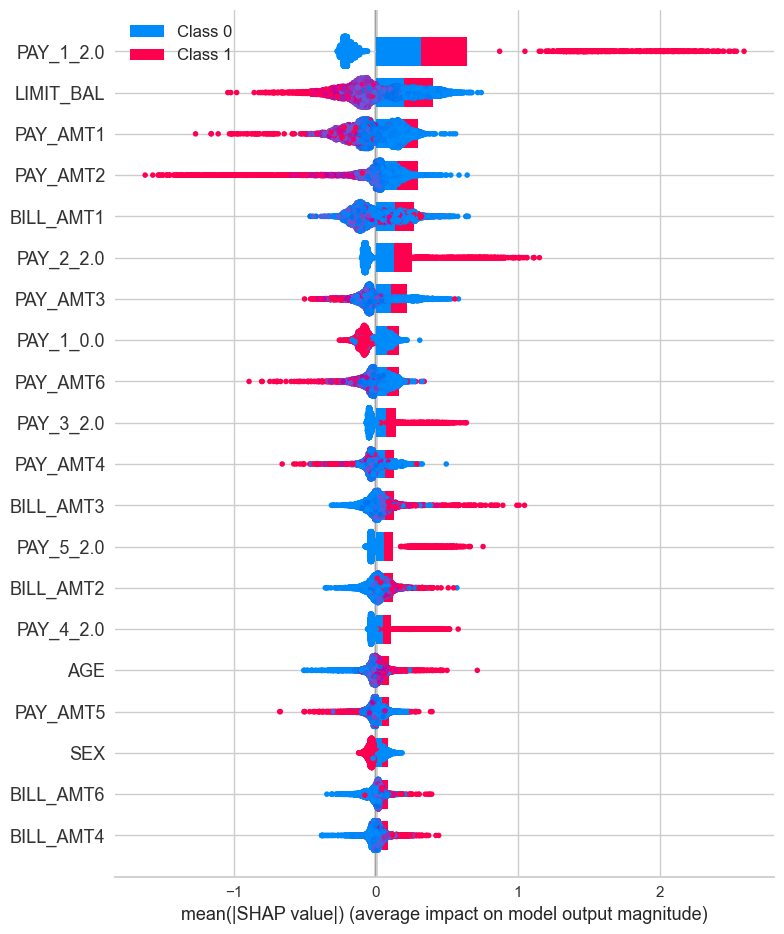

In [30]:
interpret_model(lightgbm)

In [31]:
preds = predict_model(lightgbm, raw_score=True)
preds.head(10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit
0,Light Gradient Boosting Machine,0.8167,0.7687,0.3480,0.6627,0.4563,0.3587,0.3856,2799000


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,prediction_label,prediction_score_0,prediction_score_1
21784,210000.0,1,1,2,33,-1,-1,-1,-1,-1,...,10046.0,2570.0,14722.0,11220.0,14800.0,7250.0,0,0,0.9684,0.0316
4076,200000.0,2,2,1,43,2,2,2,2,2,...,0.0,14500.0,6400.0,7000.0,7000.0,7000.0,0,1,0.1647,0.8353
4720,250000.0,1,2,2,30,0,0,0,0,0,...,6523.0,7992.0,6475.0,6050.0,6197.0,6000.0,0,0,0.9117,0.0883
13065,80000.0,2,3,1,40,-1,0,0,0,0,...,6500.0,5000.0,4025.0,8000.0,5000.0,2000.0,0,0,0.9378,0.0622
4555,50000.0,2,1,2,26,1,-2,-2,-2,-1,...,0.0,0.0,0.0,350.0,351.0,4076.0,0,0,0.7789,0.2211
2137,50000.0,1,2,2,25,0,0,0,0,0,...,2375.0,2375.0,2375.0,3547.0,0.0,0.0,0,0,0.8512,0.1488
13600,50000.0,2,2,2,22,0,0,2,0,0,...,3700.0,0.0,1200.0,710.0,52.0,1000.0,0,0,0.7349,0.2651
2404,300000.0,1,1,2,25,0,0,0,0,0,...,4103.0,1427.0,600.0,1200.0,2500.0,18000.0,0,0,0.9505,0.0495
8686,150000.0,2,3,2,60,0,0,0,0,0,...,6780.0,4800.0,3496.0,3618.0,4000.0,3497.0,1,0,0.8659,0.1341
10014,100000.0,2,2,2,27,2,3,3,2,2,...,2900.0,1300.0,3000.0,5450.0,2000.0,0.0,1,1,0.2168,0.7832


In [32]:
get_config('X_test_transformed').iloc[0]

LIMIT_BAL        210000.0
SEX                   0.0
EDUCATION_1.0         1.0
EDUCATION_2.0         0.0
EDUCATION_3.0         0.0
                   ...   
PAY_AMT2           2570.0
PAY_AMT3          14722.0
PAY_AMT4          11220.0
PAY_AMT5          14800.0
PAY_AMT6           7250.0
Name: 21784, Length: 89, dtype: float64

In [33]:
interpret_model(lightgbm, plot = 'reason', observation = 0)

In [34]:
get_config('X_test_transformed').iloc[1]

LIMIT_BAL        200000.0
SEX                   1.0
EDUCATION_1.0         0.0
EDUCATION_2.0         1.0
EDUCATION_3.0         0.0
                   ...   
PAY_AMT2          14500.0
PAY_AMT3           6400.0
PAY_AMT4           7000.0
PAY_AMT5           7000.0
PAY_AMT6           7000.0
Name: 4076, Length: 89, dtype: float64

In [35]:
interpret_model(lightgbm, plot = 'reason', observation = 1)

# Fairness 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit
0,Linear Discriminant Analysis,0.8165,0.7542,0.3492,0.6611,0.4570,0.3591,0.3856,2804500


,Samples,Accuracy,Recall,Precision,F1,Kappa,MCC,Profit,Selection Rate
EDUCATION,,,,,,,,,
0,2.0,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,3000.0,0.000000
1,2481.0,0.850060,0.323210,0.712919,0.444776,0.371972,0.411025,1380000.0,0.084240
2,3437.0,0.798080,0.340269,0.642032,0.444800,0.335342,0.360614,1002500.0,0.125982
3,1189.0,0.795627,0.418301,0.663212,0.513026,0.391982,0.408657,337000.0,0.162321
4,24.0,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,36000.0,0.000000
5,55.0,0.854545,0.000000,0.000000,0.000000,-0.078431,-0.078431,50500.0,0.072727
6,12.0,0.666667,0.250000,0.500000,0.333333,0.142857,0.158114,-4500.0,0.166667


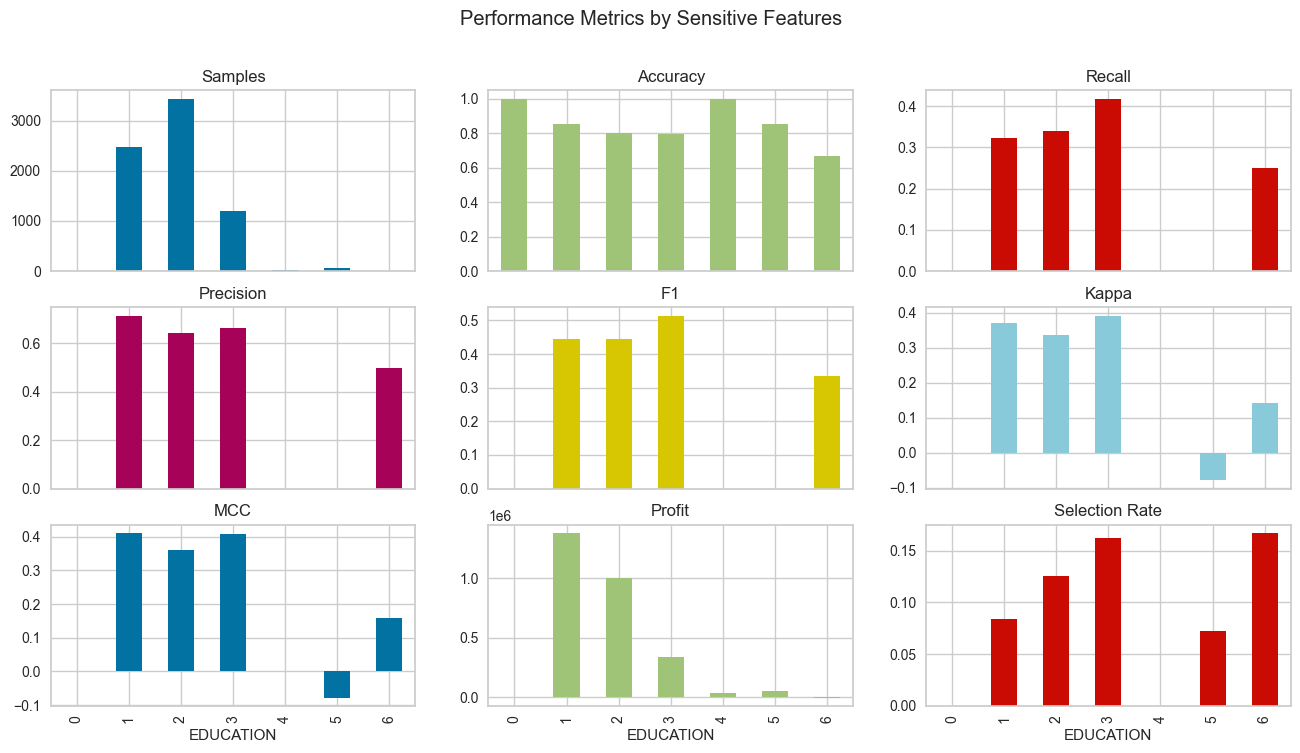

In [36]:
check_fairness(best, sensitive_features=['EDUCATION'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit
0,Linear Discriminant Analysis,0.8165,0.7542,0.3492,0.6611,0.4570,0.3591,0.3856,2804500


Samples  Accuracy    Recall  Precision        F1     Kappa  \
EDUCATION SEX                                                               
0         1        2.0  1.000000  0.000000   0.000000  0.000000       NaN   
          2        NaN       NaN       NaN        NaN       NaN       NaN   
1         1      985.0  0.851777  0.372449   0.760417  0.500000  0.424732   
          2     1496.0  0.848930  0.286792   0.672566  0.402116  0.331295   
2         1     1348.0  0.781899  0.345238   0.610526  0.441065  0.318311   
          2     2089.0  0.808521  0.336798   0.666667  0.447514  0.346508   
3         1      463.0  0.781857  0.428571   0.695122  0.530233  0.398415   
          2      726.0  0.804408  0.410405   0.639640  0.500000  0.385545   
4         1        7.0  1.000000  0.000000   0.000000  0.000000       NaN   
          2       17.0  1.000000  0.000000   0.000000  0.000000       NaN   
5         1       18.0  0.833333  0.000000   0.000000  0.000000 -0.080000   
          2       37.0  0.864865  0.000000   0.000000  0.000000 -0.069364   
6         1        3.0  0.666667  0.000000   0.000000  0.000000  0.000000   
          2        9.0  0.666667  0.333333   0.500000  0.400000  0.181818   

                    MCC    Profit  Selection Rate  
EDUCATION SEX                                      
0         1    0.000000    3000.0        0.000000  
          2         NaN       NaN             NaN  
1         1    0.462117  534000.0        0.097462  
          2    0.370926  846000.0        0.075535  
2         1    0.338285  307000.0        0.140950  
          2    0.376104  695500.0        0.116324  
3         1    0.418176   77500.0        0.177106  
          2    0.400217  259500.0        0.152893  
4         1    0.000000   10500.0        0.000000  
          2    0.000000   25500.0        0.000000  
5         1   -0.085749   17500.0        0.111111  
          2   -0.071007   33000.0        0.054054  
6         1    0.000000   -2000.0        0.000000  
          2    0.188982   -2500.0        0.222222

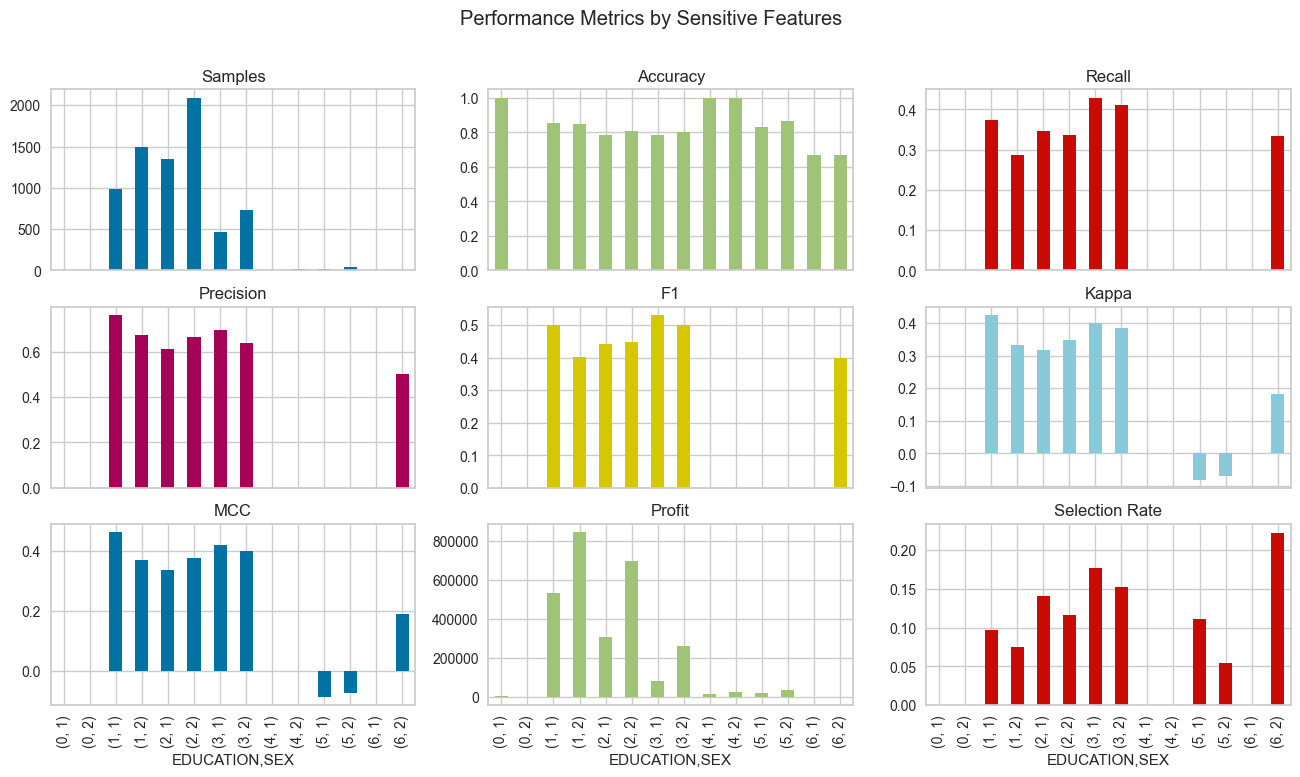

In [37]:
check_fairness(best, sensitive_features=['EDUCATION', 'SEX'])

In [38]:
preds

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,prediction_label,prediction_score_0,prediction_score_1
21784,210000.0,1,1,2,33,-1,-1,-1,-1,-1,...,10046.0,2570.0,14722.0,11220.0,14800.0,7250.0,0,0,0.9684,0.0316
4076,200000.0,2,2,1,43,2,2,2,2,2,...,0.0,14500.0,6400.0,7000.0,7000.0,7000.0,0,1,0.1647,0.8353
4720,250000.0,1,2,2,30,0,0,0,0,0,...,6523.0,7992.0,6475.0,6050.0,6197.0,6000.0,0,0,0.9117,0.0883
13065,80000.0,2,3,1,40,-1,0,0,0,0,...,6500.0,5000.0,4025.0,8000.0,5000.0,2000.0,0,0,0.9378,0.0622
4555,50000.0,2,1,2,26,1,-2,-2,-2,-1,...,0.0,0.0,0.0,350.0,351.0,4076.0,0,0,0.7789,0.2211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15780,170000.0,2,1,2,32,-1,-1,-1,-1,-1,...,2999.0,4904.0,68.0,2761.0,2673.0,1861.0,0,0,0.9055,0.0945
12000,110000.0,1,3,1,43,0,0,0,0,0,...,4500.0,5000.0,3043.0,2000.0,3000.0,5000.0,0,0,0.8990,0.1010
16320,200000.0,1,1,1,27,2,2,2,2,0,...,14600.0,7000.0,0.0,6000.0,11500.0,24.0,1,1,0.2397,0.7603
4295,50000.0,2,2,0,28,1,2,0,0,0,...,0.0,3154.0,1669.0,1741.0,3900.0,0.0,0,0,0.5740,0.4260


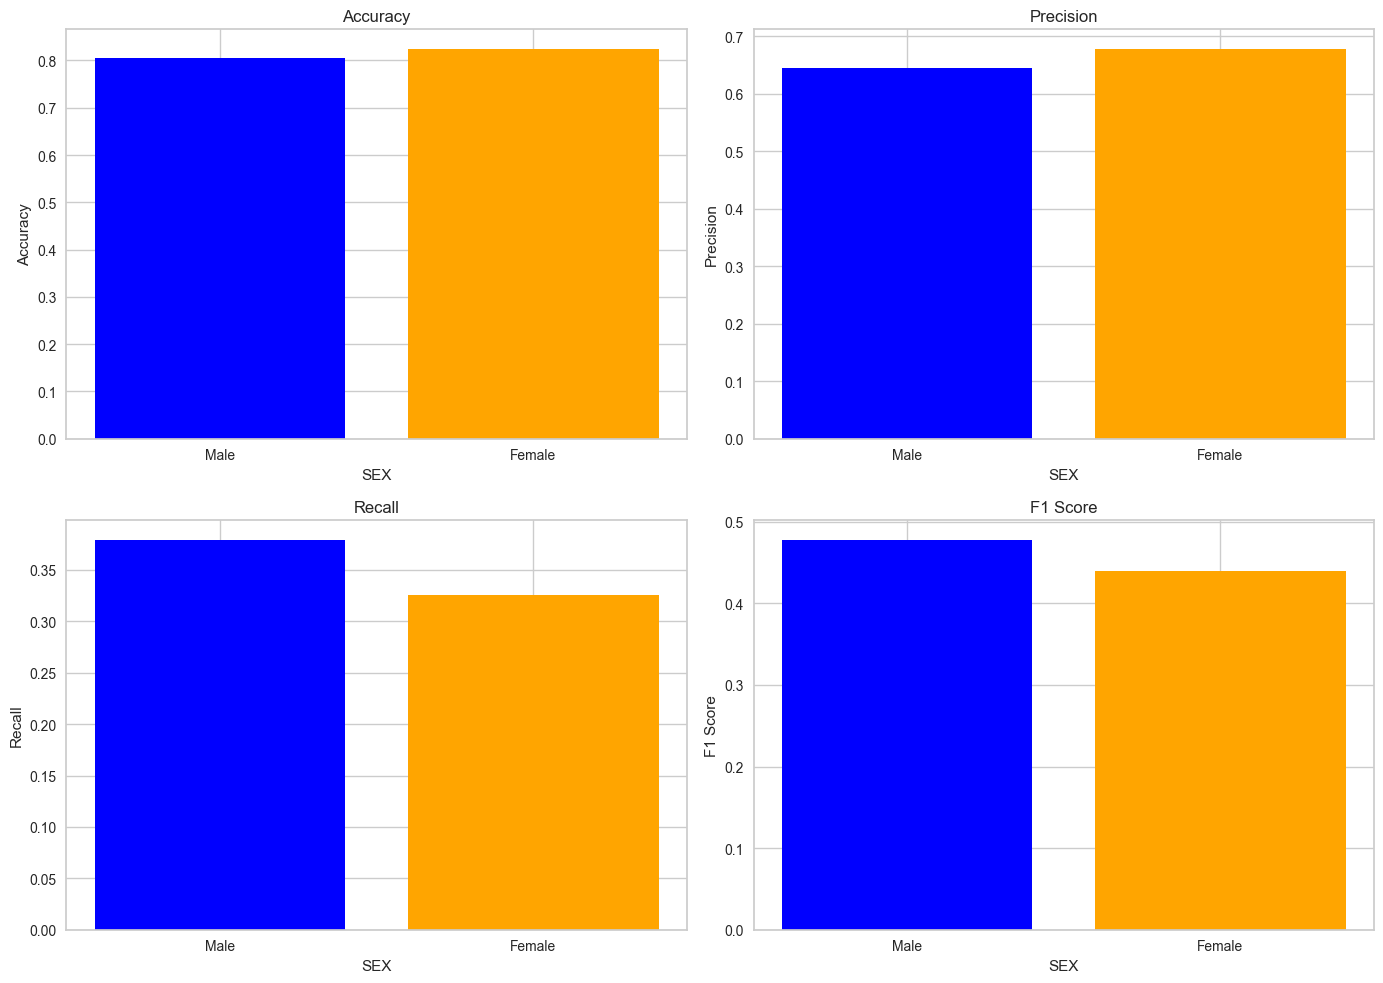

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

def calculate_metrics_by_sex(df):
    metrics = {
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1 Score': []
    }
    sexes = df['SEX'].unique()
    
    for sex in sexes:
        subset = df[df['SEX'] == sex]
        y_true = subset['DEFAULT']
        y_pred = subset['prediction_label']
        
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        
        metrics['Accuracy'].append((sex, accuracy))
        metrics['Precision'].append((sex, precision))
        metrics['Recall'].append((sex, recall))
        metrics['F1 Score'].append((sex, f1))
    
    return metrics

def plot_metrics(metrics):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()
    
    for ax, (metric, values) in zip(axes, metrics.items()):
        sexes, scores = zip(*values)
        ax.bar(sexes, scores, color=['blue', 'orange'])
        ax.set_title(metric)
        ax.set_xlabel('SEX')
        ax.set_ylabel(metric)
        ax.set_xticks(sexes)
        ax.set_xticklabels(['Male', 'Female'] if 1 in sexes else ['Female', 'Male'])
    
    plt.tight_layout()
    plt.show()

# Assuming preds is your DataFrame
metrics_by_sex = calculate_metrics_by_sex(preds)
plot_metrics(metrics_by_sex)